# **Mounting Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Import Library**

In [ ]:
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import precision_recall_fscore_support
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from keras import layers
from keras import ops


# **Downloading Datasets**

In [ ]:
from google.colab import files
files.upload()

{}

In [ ]:
!kaggle datasets download -d arashnic/book-recommendation-dataset -p /content/drive/MyDrive/ML-Project/Datasets
!unzip /content/drive/MyDrive/ML-Project/Datasets/book-recommendation-dataset.zip -d /content/drive/MyDrive/ML-Project/Datasets

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/cli.py", line 68, in main
    out = args.func(**command_args)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 1734, in dataset_download_cli
    with self.build_kaggle_client() as kaggle:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 688, in build_kaggle_client
    username=self.config_values['username'],
             ~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
KeyError: 'username'
Archive:  /content/drive/MyDrive/ML-Project/Datasets/book-recommendation-dataset.zip
replace /content/drive/MyDrive/ML-Project/Datasets/Books.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

# **Loading Datasets**

In [ ]:
books = pd.read_csv('/content/drive/MyDrive/ML-Project/Datasets/Books.csv')
ratings = pd.read_csv('/content/drive/MyDrive/ML-Project/Datasets/Ratings.csv')
users = pd.read_csv('/content/drive/MyDrive/ML-Project/Datasets/Users.csv')

<ipython-input-3-0325326f4532>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('/content/drive/MyDrive/ML-Project/Datasets/Books.csv')


In [ ]:
jml_baris, jml_kolom = books.shape
print('jumlah baris', jml_baris)
print('jumlah kolom', jml_kolom)

books.head()

jumlah baris 271360
jumlah kolom 8


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
jml_baris, jml_kolom = ratings.shape
print('jumlah baris', jml_baris)
print('jumlah kolom', jml_kolom)

ratings.head()

jumlah baris 1149780
jumlah kolom 3


,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
jml_baris, jml_kolom = users.shape # Mendapatkan jumlah baris dan kolom
print('jumlah baris', jml_baris) # Menampilkan jumlah baris
print('jumlah kolom', jml_kolom) # Menampilkan jumlah kolom

users.head() # Menampilkan 5 baris teratas

jumlah baris 278858
jumlah kolom 3


,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


# *Exploratory Data Analysis(EDA)*


In [ ]:
books.describe()
ratings.describe()
users.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


## Books

In [ ]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


Mengubah tipe data Year-Of-Publication yang sebelumnya bertype object menjadi integer

In [ ]:
# jika langsung menjalankan kode ini maka terjadi error karena ada kesalahan input
# books['Year-Of-Publication'].astype('int')

# Year-Of-Publication yang terjadi kesalahan input
books[(books['Year-Of-Publication'] == 'DK Publishing Inc') | (books['Year-Of-Publication'] == 'Gallimard')]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [ ]:
# menghapus data yang terjadi kesalahan input
temp = (books['Year-Of-Publication'] == 'DK Publishing Inc') | (books['Year-Of-Publication'] == 'Gallimard')
books = books.drop(books[temp].index)

# mengubah tipe data menjadi integer
books['Year-Of-Publication'] = books['Year-Of-Publication'].astype(int)
print(books.dtypes)

ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication     int64
Publisher              object
Image-URL-S            object
Image-URL-M            object
Image-URL-L            object
dtype: object


menghapus kolom yang tidak diperlukan

In [ ]:
books = books.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis=1)
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [ ]:
# melihat berapa banyak entri dari masing - masing variabel
print("Jumlah nomor ISBN Buku:", len(books['ISBN'].unique()))
print("Jumlah judul buku:", len(books['Book-Title'].unique()))
print('Jumlah penulis buku:', len(books['Book-Author'].unique()))
print('Jumlah Tahun Publikasi:', len(books['Year-Of-Publication'].unique()))
print('Jumlah nama penerbit:', len(books['Publisher'].unique()))

Jumlah nomor ISBN Buku: 271357
Jumlah judul buku: 242132
Jumlah penulis buku: 102021
Jumlah Tahun Publikasi: 116
Jumlah nama penerbit: 16805


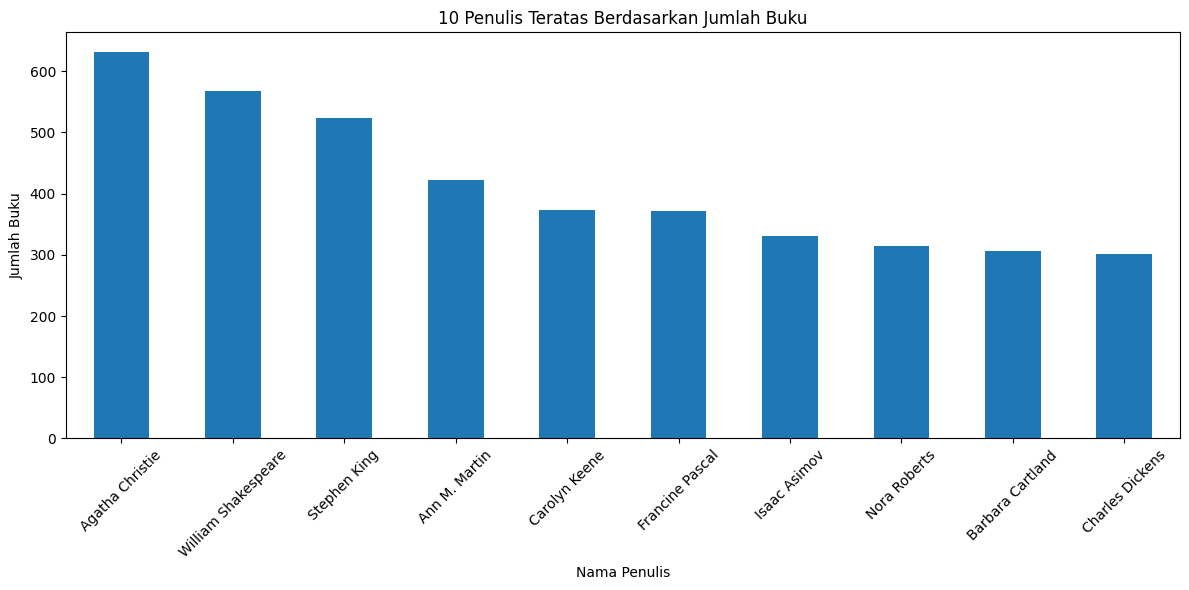

In [ ]:
# Grouping'Book-Author' dan hitung jumlah buku yang ditulis oleh masing-masing penulis
author_counts = books.groupby('Book-Author')['Book-Title'].count()

# Urutkan penulis dalam urutan menurun
sorted_authors = author_counts.sort_values(ascending=False)

# Pilih 10 penulis teratas
top_10_authors = sorted_authors.head(10)

# Plot 10 penulis teratas dan buku yang ditulis oleh penulis kemudian dihitung menggunakan plot batang
plt.figure(figsize=(12, 6))
top_10_authors.plot(kind='bar')
plt.xlabel('Nama Penulis')
plt.ylabel('Jumlah Buku')
plt.title('10 Penulis Teratas Berdasarkan Jumlah Buku')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Ratings

In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


Melihat jumlah entri dari masing - masing variabel

In [ ]:
print('Jumlah User-ID:', len(ratings['User-ID'].unique()))
print('Jumlah buku berdasarkan ISBN:', len(ratings['ISBN'].unique()))

print('Jumlah rating buku:')
sorted_ratings = ratings['Book-Rating'].value_counts().sort_index()
pd.DataFrame({'Book-Rating': sorted_ratings.index, 'Jumlah': sorted_ratings.values})

Jumlah User-ID: 105283
Jumlah buku berdasarkan ISBN: 340556
Jumlah rating buku:


,Book-Rating,Jumlah
0,0,716109
1,1,1770
2,2,2759
3,3,5996
4,4,8904
5,5,50974
6,6,36924
7,7,76457
8,8,103736
9,9,67541


Jika dilihat pada informasi sebelumnya, dataset ratings memiliki 1149780 baris data. Guna menghemat memory maka hanya akan mengambil sampel sebanyak 30000 data saja

In [ ]:
df_ratings = ratings[:30000]
df_ratings

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
29995,7105,0140120831,10
29996,7105,014012389X,8
29997,7105,014014305X,6
29998,7105,014023750X,0


## Users

In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


Dari informasi diatas, dataset user berisi User-ID, lokasi(Location) dan umur(Age). Data tersebut digunakan jika ingin membuat sistem rekomendasi berdasarkan demografi atau kondisi sosial pengguna. Pada sistem rekomendasi kali ini tidak menerapkannya yang digunakan hanya books dan ratings saja

# Data Preprocessing

Menggabungkan dataset books dan rating menjadi satu kesatuan

In [ ]:
books = pd.merge(ratings, books, on='ISBN', how='left')
books

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001.0,Heinle
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996.0,Warner Books
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999.0,Cambridge University Press
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001.0,Cambridge University Press
...,...,...,...,...,...,...,...
1149775,276704,1563526298,9,Get Clark Smart : The Ultimate Guide for the S...,Clark Howard,2000.0,Longstreet Press
1149776,276706,0679447156,0,Eight Weeks to Optimum Health: A Proven Progra...,Andrew Weil,1997.0,Alfred A. Knopf
1149777,276709,0515107662,10,The Sherbrooke Bride (Bride Trilogy (Paperback)),Catherine Coulter,1996.0,Jove Books
1149778,276721,0590442449,10,Fourth Grade Rats,Jerry Spinelli,1996.0,Scholastic


In [ ]:
# menampilkan rating berdasarkan ISBN
books.groupby('ISBN').sum()

,User-ID,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
ISBN,,,,,,
0330299891,271009,6,0,0,0.0,0
0375404120,356057,3,0,0,0.0,0
0586045007,89192,0,0,0,0.0,0
9022906116,100868,7,0,0,0.0,0
9032803328,89192,0,0,0,0.0,0
...,...,...,...,...,...,...
cn113107,107301,0,0,0,0.0,0
ooo7156103,266146,7,0,0,0.0,0
§423350229,85250,0,0,0,0.0,0


Menghapus missing value

In [ ]:
books.isnull().sum()

,0
User-ID,0
ISBN,0
Book-Rating,0
Book-Title,118648
Book-Author,118650
Year-Of-Publication,118648
Publisher,118650


In [ ]:
# menghapus data yang memiliki NaN
clean_books = books.dropna()

clean_books.isnull().sum()

,0
User-ID,0
ISBN,0
Book-Rating,0
Book-Title,0
Book-Author,0
Year-Of-Publication,0
Publisher,0


In [ ]:
len(clean_books['ISBN'].unique())

270144

In [ ]:
len(clean_books['Book-Title'].unique())

241065

Dari hasil diatas dapat disimpulkan ISBN yang berbeda memiliki Book-Title yang sama atau terjadi duplikasi. Maka perlu melakukan proses menghapus data yang duplikat dengan kode dibawah

In [ ]:
clean_books = clean_books.drop_duplicates('Book-Title')
clean_books

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001.0,Heinle
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996.0,Warner Books
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999.0,Cambridge University Press
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001.0,Cambridge University Press
...,...,...,...,...,...,...,...
1149689,276688,0425150526,0,Death Crosses the Border,Janice Steinberg,1995.0,Berkley Publishing Group
1149698,276688,0449907422,0,Jazz Funeral: A Skip Langdon Novel,Julie Smith,1993.0,Ballantine Books
1149757,276690,0590907301,0,Triplet Trouble and the Class Trip (Triplet Tr...,Debbie Dadey,1997.0,Apple
1149770,276704,0679752714,0,A Desert of Pure Feeling (Vintage Contemporaries),Judith Freeman,1997.0,Vintage Books USA


# Data Preparation untuk model Colaborative Filtering

Encoding

In [ ]:
# fungsi untuk encoding data
def encoding(data_series):
    data = data_series.unique().tolist()
    encoded = {x: i for i, x in enumerate(data)}
    return encoded
# fungsi untuk decoding data
def decoding(data_series):
    data = data_series.unique().tolist()
    decoded = {i: x for i, x in enumerate(data)}
    return decoded

user_encoding = encoding(df_ratings['User-ID'])
isbn_encoding = encoding(df_ratings['ISBN'])

df_ratings['user'] = df_ratings['User-ID'].map(user_encoding)
df_ratings['book_title'] = df_ratings['ISBN'].map(isbn_encoding)

df_ratings.head()

<ipython-input-25-600d005b116f>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ratings['user'] = df_ratings['User-ID'].map(user_encoding)
<ipython-input-25-600d005b116f>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ratings['book_title'] = df_ratings['ISBN'].map(isbn_encoding)


,User-ID,ISBN,Book-Rating,user,book_title
0,276725,034545104X,0,0,0
1,276726,0155061224,5,1,1
2,276727,0446520802,0,2,2
3,276729,052165615X,3,3,3
4,276729,0521795028,6,3,4


In [ ]:
# num_user
num_user = len(user_encoding)
print(f"Number of User : {num_user}")
# num_book_title
num_book = len(isbn_encoding)
print(f"Number of Book : {num_book}")

Number of User : 3445
Number of Book : 24009


In [ ]:
# mengubah nilai rating menjadi float
df_ratings['Book-Rating'] = df_ratings['Book-Rating'].values.astype(np.float32)

# nilai minimum rating
min_rating = min(df_ratings['Book-Rating'])
# nilai maksimum rating
max_rating = max(df_ratings['Book-Rating'])

print(df_ratings.shape[0])

30000


<ipython-input-27-04f6ea2bbfff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ratings['Book-Rating'] = df_ratings['Book-Rating'].values.astype(np.float32)


# Modeling

## Content Base Filtering

In [ ]:
books = clean_books[:20000]
books = books.rename(columns={'Book-Title': 'title', 'Book-Author': 'author'})

print('Jumlah data buku:', len(books.ISBN.unique()))
print('Jumlah data rating buku dari pembaca:', len(ratings.ISBN.unique()))
print('jumlah data pengguna:', len(users['User-ID'].unique()))

# Books variabel
# Menghapus value pada 'Year-Of-Publication' yang bernilai teks
books[(books['Year-Of-Publication'] == 'DK Publishing Inc')
      | (books['Year-Of-Publication'] == 'Gallimard')]

temp = (books['Year-Of-Publication'] ==
        'DK Publishing Inc') | (books['Year-Of-Publication'] == 'Gallimard')
books = books.drop(books[temp].index)
books[(books['Year-Of-Publication'] == 'DK Publishing Inc')
      | (books['Year-Of-Publication'] == 'Gallimard')]

books['Year-Of-Publication'] = books['Year-Of-Publication'].astype(int)
print(books.dtypes)

books.head()

print("Jumlah nomor ISBN Buku:", len(books['ISBN'].unique()))
print("Jumlah judul buku:", len(books['title'].unique()))
print('Jumlah penulis buku:', len(books['author'].unique()))
print('Jumlah Tahun Publikasi:', len(books['Year-Of-Publication'].unique()))
print('Jumlah nama penerbit:', len(books['Publisher'].unique()))


Jumlah data buku: 20000
Jumlah data rating buku dari pembaca: 340556
jumlah data pengguna: 278858
User-ID                 int64
ISBN                   object
Book-Rating             int64
title                  object
author                 object
Year-Of-Publication     int64
Publisher              object
dtype: object
Jumlah nomor ISBN Buku: 20000
Jumlah judul buku: 20000
Jumlah penulis buku: 10948
Jumlah Tahun Publikasi: 68
Jumlah nama penerbit: 2700


In [ ]:
# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()

# Melakukan perhitungan idf pada data book_author
tf.fit(books['author'])

# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names_out()

# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tf.fit_transform(books['author'])

# Melihat ukuran matrix tfidf
tfidf_matrix.shape

# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=books.title
).sample(15, axis=1).sample(10, axis=0)

,ferguson,hillary,squire,jeanne,jennifer,early,winters,stang,lynnette,brandner,mosionier,herriot,dawn,derleth,hardin
title,,,,,,,,,,,,,,,
Winnie the Pooh and the Honey Tree (Little Golden Books),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101 Ways to Bug Your Parents,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Andersen's Fairy Tales (Signet Classics),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Good Advice : More Than 2,000 Quotations to help You Live Your Life",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
How Not to Say What You Mean: A Dictionary of Euphemisms (Oxford Paperback Reference S.),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Karen's Monsters (Baby-Sitters Little Sister, 66)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
White Trash Cooking (Jargon),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Professor and the Madman,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
I Capture the Castle,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix)

# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa nama judul buku
cosine_sim_df = pd.DataFrame(
    cosine_sim, index=books['title'], columns=books['title'])
print('Shape:', cosine_sim_df.shape)

# Melihat similarity matrix pada setiap judul buku
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)


Shape: (20000, 20000)


title,Sams Teach Yourself e-Genealogy Today,Stranger in a Strange Land (Remembering Tomorrow),In Our Time: Stories (Scribner Classic),The Professional Image,The Return of the King
title,,,,,
Das Geheimnis der Maske.,0.0,0.0,0.0,0.0,0.0
An Indecent Obsession,0.0,0.0,0.0,0.0,0.0
Mal'aria: [romanzo] (Narrativa),0.0,0.0,0.0,0.0,0.0
Potiki (Talanoa : Contemporary Pacific Literature),0.0,0.0,0.0,0.0,0.0
"McGee &amp; Stuckey's Bountiful Container: A Container Garden of Vegetables, Herbs, Fruits, and Edible Flowers",0.0,0.0,0.0,0.0,0.0
Peace Like a River,0.0,0.0,0.0,0.0,0.0
Edge of the sacred: Transformation in Australia,0.0,0.0,0.0,0.0,0.0
LA Peste (Folio Series: No. 42),0.0,0.0,0.0,0.0,0.0
Mockingbird,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Mendapatkan rekomendasi
def book_recommendation(book_title, similarity_data=cosine_sim_df, items=books[['title', 'author']], k=5):
    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    if book_title not in similarity_data.columns:
        print(f"Book '{book_title}' not found in the similarity matrix.")
        return pd.DataFrame()

    index = similarity_data.loc[:, book_title].to_numpy(
    ).argpartition(range(-1, -k, -1))

    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Drop book_title agar nama buku yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(book_title, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

# contoh judul buku
book_title_test = "She Said Yes: The Unlikely Martyrdom of Cassie Bernall"

books[books['title'].eq(book_title_test)]

# Mendapatkan rekomendasi judul buku yang mirip
book_recommendation(book_title_test)


,title,author
0,She Said Yes : The Unlikely Martyrdom of Cassi...,Misty Bernall
1,A Tale of Two Turkeys,Ellen Jackson
2,All Dogs Go to Heaven 2/Novelization,Ron Fontes
3,Twin Sisters,Janice Harrell
4,101 Ways To Boost Your Math Skills,Susan Shafer


In [ ]:
# Evaluasi Model dengan Content Based Filtering
# Menentukan threshold untuk mengkategorikan similarity sebagai 1 atau 0
threshold = 0.5

# Membuat ground truth data dengan asumsi threshold
ground_truth = np.where(cosine_sim >= threshold, 1, 0)

# Menampilkan beberapa nilai pada ground truth matrix
ground_truth_df = pd.DataFrame(
    ground_truth, index=books['title'], columns=books['title']).sample(5, axis=1).sample(10, axis=0)


# Mengambil sebagian kecil dari cosine similarity matrix dan ground truth matrix
sample_size = 10000
cosine_sim_sample = cosine_sim[:sample_size, :sample_size]
ground_truth_sample = ground_truth[:sample_size, :sample_size]

# Mengonversi cosine similarity matrix menjadi array satu dimensi untuk perbandingan
cosine_sim_flat = cosine_sim_sample.flatten()

# Mengonversi ground truth matrix menjadi array satu dimensi
ground_truth_flat = ground_truth_sample.flatten()

# Menghitung metrik evaluasi
predictions = (cosine_sim_flat >= threshold).astype(int)
precision, recall, f1, _ = precision_recall_fscore_support(
    ground_truth_flat, predictions, average='binary', zero_division=1
)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Precision: 1.0
Recall: 1.0
F1-score: 1.0


## Collaborative Filtering

### Data Spliting

In [ ]:
x = df_ratings[['user', 'book_title']].values
y = df_ratings['Book-Rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

### Model Colaborative Filtering

Untuk model Colaborative Filtering saya mengambil referensi dari [keras](https://keras.io/examples/structured_data/collaborative_filtering_movielens/) dengan menyesuaikan dengan kasus yang sedang dikerjakan.



In [ ]:
class RecommenderNet(keras.Model):
    def __init__(self, num_users, num_book, embedding_size, dropout_rate=0.2, **kwargs):
        super().__init__(**kwargs)
        self.num_users = num_users
        self.num_book = num_book
        self.embedding_size = embedding_size
        self.dropout_rate = dropout_rate

        self.user_embedding = layers.Embedding( # layer embedding user
            num_users,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-6),
        )
        self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias

        self.book_embedding = layers.Embedding( # layer embedding book_title
            num_book,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-6),
        )
        self.book_bias = layers.Embedding(num_book, 1) # layer embedding book bias
        self.dropout = layers.Dropout(rate=dropout_rate)
    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0]) # memanggil layer embedding 1
        user_vector = self.dropout(user_vector)
        user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2

        book_vector = self.book_embedding(inputs[:, 1]) # memanggil layer embedding 3
        book_vector = self.dropout(book_vector)
        book_bias = self.book_bias(inputs[:, 1]) # memanggil layer embedding 4

        dot_user_book = ops.tensordot(user_vector, book_vector, 2) # perkalian dot product

        x = dot_user_book + user_bias + book_bias

        return ops.nn.sigmoid(x) # activation sigmoid

In [ ]:
import tensorflow as tf

modelCF = RecommenderNet(num_user, num_book, 50)

modelCF.compile(optimizer=Adam(learning_rate=0.0001),
                loss='mse',
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [ ]:
historyCF = modelCF.fit(
    x_train,
    y_train,
    batch_size=16,
    epochs=50,
    validation_data=(x_test, y_test)
)

Epoch 1/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - loss: 0.1875 - root_mean_squared_error: 0.4328 - val_loss: 0.1793 - val_root_mean_squared_error: 0.4233
Epoch 2/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1732 - root_mean_squared_error: 0.4160 - val_loss: 0.1703 - val_root_mean_squared_error: 0.4125
Epoch 3/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1548 - root_mean_squared_error: 0.3933 - val_loss: 0.1635 - val_root_mean_squared_error: 0.4041
Epoch 4/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1409 - root_mean_squared_error: 0.3751 - val_loss: 0.1585 - val_root_mean_squared_error: 0.3978
Epoch 5/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.1336 - root_mean_squared_error: 0.3653 - val_loss: 0.1545 - val_root_mean_squared_error: 0.3928
Epoch 6/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1325 - root_mean_squared_error: 0.3638 - val_loss: 0.1511 - val_root_mean_squared_error: 0.3884
Epoch 7/50
1688/1688 ━━━━━━━━━━━━━━━━━━

### Mendapatkan Rekomendasi

In [ ]:
book = clean_books.copy()
book = book.rename(columns={'Book-Title': 'title', 'Book-Author': 'author'})

# mengambil sampel user
user_id = df_ratings['User-ID'].sample(1).iloc[0]
book_readed_by_user = df_ratings[df_ratings['User-ID'] == user_id]

# membuat variabel book_not_readed
book_not_readed = book[~book['ISBN'].isin(book_readed_by_user['ISBN'].values)]['ISBN']
book_not_readed = list(
    set(book_not_readed)
    .intersection(set(isbn_encoding.keys()))
)

book_not_readed = [[isbn_encoding.get(x)] for x in book_not_readed]
user_encoder = user_encoding.get(user_id)
user_book_array = np.hstack(
    ([[user_encoder]] * len(book_not_readed), book_not_readed)
)

In [ ]:
ratings_model = modelCF.predict(user_book_array).flatten()

top_ratings_indices = ratings_model.argsort()[-10:][::-1]

recommended_book_ids = [
    book_not_readed[x][0] for x in top_ratings_indices
]

top_book_user = (
    book_readed_by_user.sort_values(
        by='Book-Rating',
        ascending=False
    )
    .head(10)['ISBN'].values
)

book_rows = book[book['ISBN'].isin(top_book_user)]

# Menampilkan rekomendasi buku dalam bentuk DataFrame
book_rows_data = []
for row in book_rows.itertuples():
    book_rows_data.append([row.title, row.author])

recommended_isbn = [list(isbn_encoding.keys())[i] for i in recommended_book_ids]
recommended_book = book[book['ISBN'].isin(recommended_isbn)]

recommended_book_data = []
for row in recommended_book.itertuples():
    recommended_book_data.append([row.title, row.author])

# Membuat DataFrame untuk output
output_columns = ['Book Title', 'Book Author']
df_book_readed_by_user = pd.DataFrame(book_rows_data, columns=output_columns)
df_recommended_books = pd.DataFrame(recommended_book_data, columns=output_columns)

# Menampilkan hasil rekomendasi dalam bentuk DataFrame
print("Showing recommendation for users: {}".format(user_id))
print("===" * 9)
print("Book with high ratings from user")
print("----" * 8)
print(df_book_readed_by_user)
print("----" * 8)
print("Top 10 books recommendation")
print("----" * 8)
df_recommended_books

595/595 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Showing recommendation for users: 6577
Book with high ratings from user
--------------------------------
                                          Book Title          Book Author
0     Hard Time (V.I. Warshawski Novels (Paperback))        SARA PARETSKY
1                             Snow Falling on Cedars       David Guterson
2                     Fall On Your Knees (Oprah #45)  Ann-Marie MacDonald
3                                 A Bend in the Road      Nicholas Sparks
4                                        Chosen Prey        John Sandford
5                           Angela's Ashes: A Memoir        Frank McCourt
6                             The Sacrifice of Tamar          Naomi Ragen
7                    The Dangerous Husband : A Novel         Jane Shapiro
8  The Ladies Auxiliary (Ballantine Reader's Circle)          Tova Mirvis
--------------------------------
Top 10 books recommendation
--------------------------------


,Book Title,Book Author
0,The Da Vinci Code,Dan Brown
1,The Bell Jar : A Novel (Perennial Classics),Sylvia Plath
2,A New Song (Mitford Years (Paperback)),Jan Karon
3,She Said Yes : The Unlikely Martyrdom of Cassi...,Misty Bernall
4,The Giver (21st Century Reference),LOIS LOWRY
5,The Kalahari Typing School for Men : More from...,Alexander McCall Smith
6,Crazy Ladies,Michael Lee West
7,Anna Karenina (Barnes &amp; Noble Classics),Leo Tolstoy
8,Blindness (Harvest Book),Jose Saramago
9,Vendetta. Commissario Brunettis vierter Fall.,Donna Leon


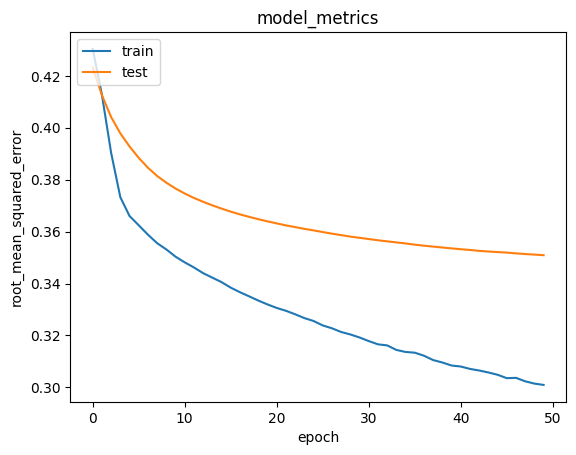

In [ ]:
plt.plot(historyCF.history['root_mean_squared_error'])
plt.plot(historyCF.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()